# Logistic Regression

## 1. Estimating Probabilities
* Sigmoid Function
* If t > 0, p >= 0.5 => 1
* If t < 0, p < 0.5 => 0

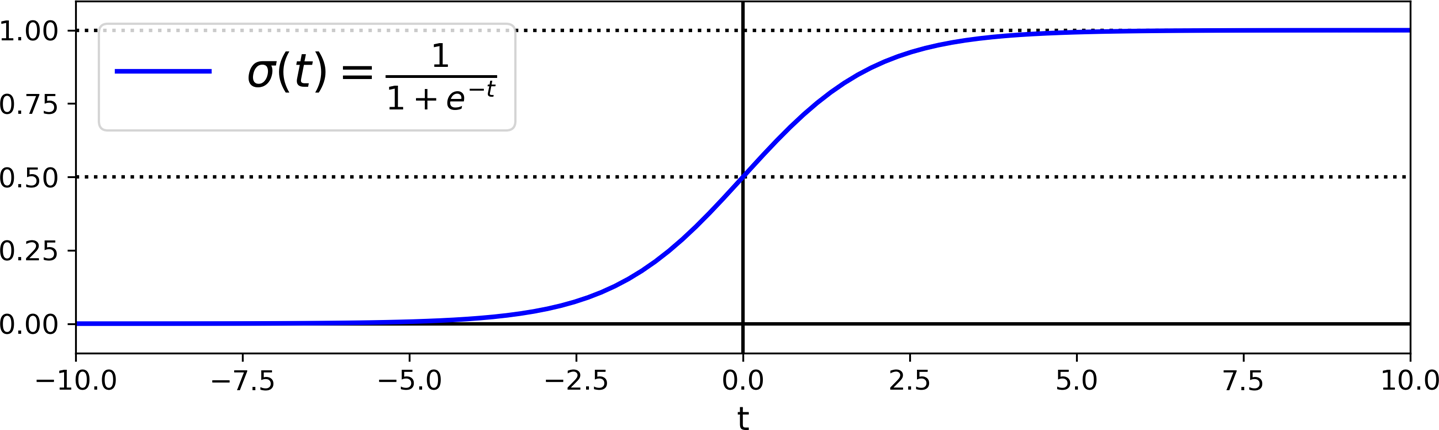

## 2. Training and Cost Function
* 1. Activation Function = Sigmoid Function
* 2. Cost Function = Log loss
* 3. Optimization = GD (MSE derivative)

## 3. Decision Boundaries

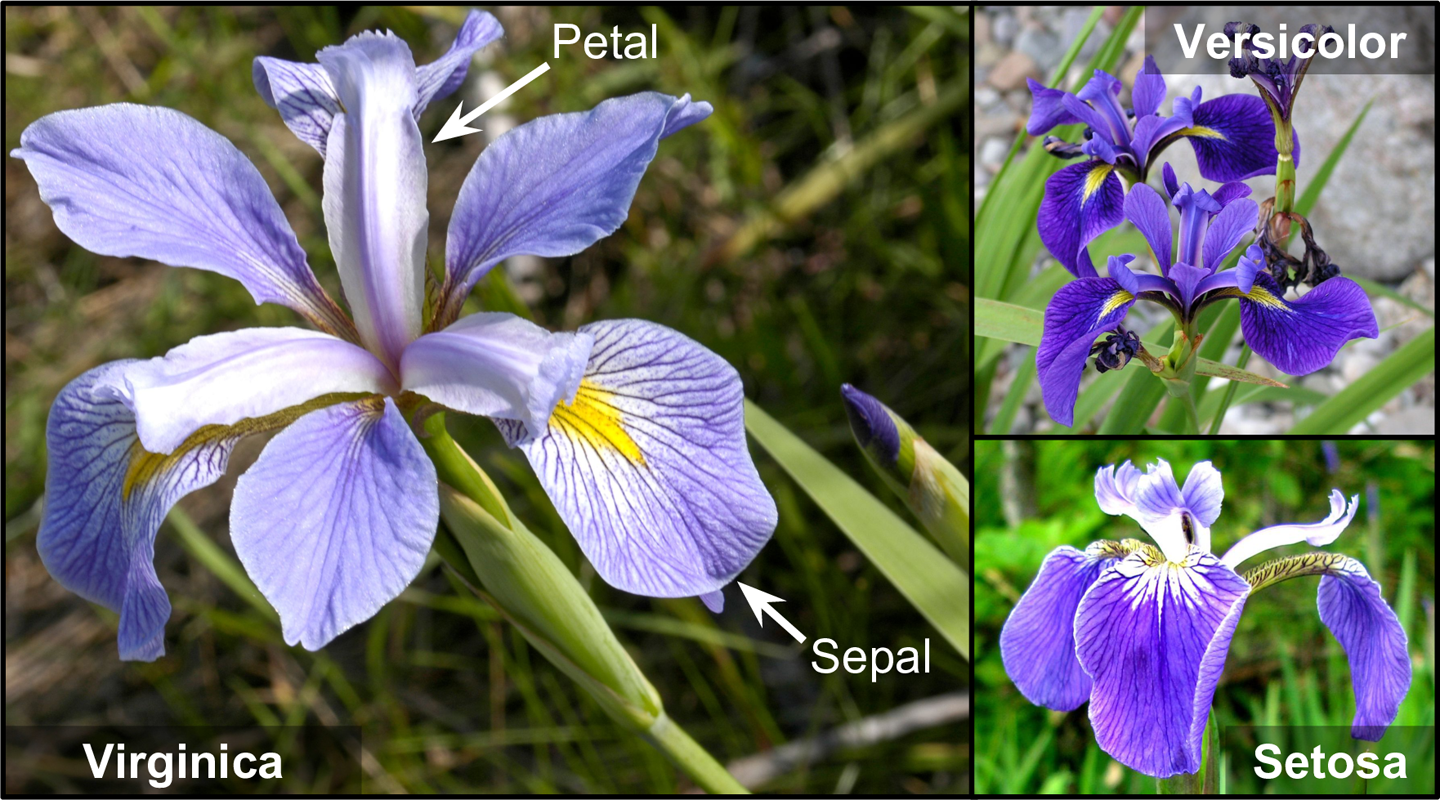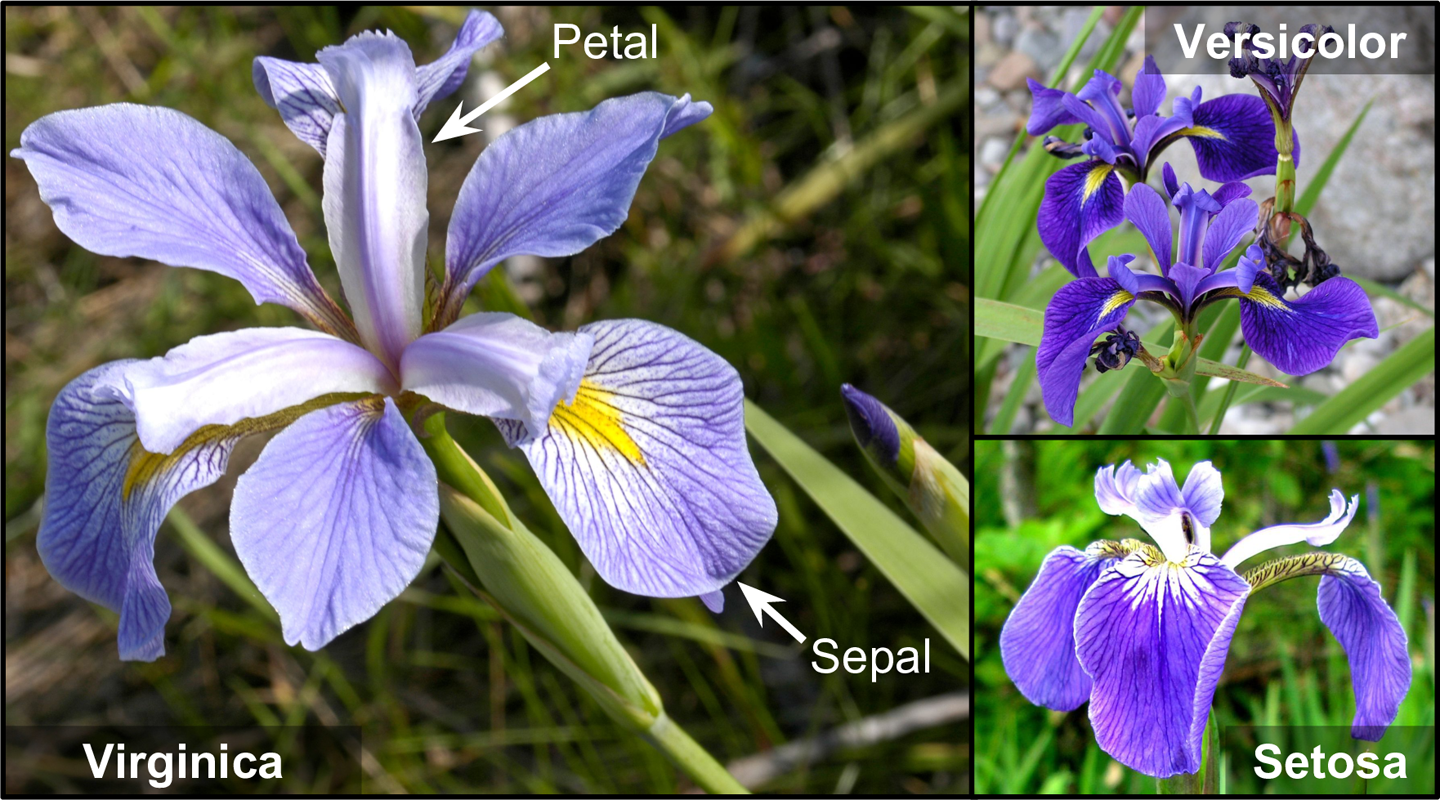

In [1]:
from sklearn import datasets

iris = datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename']

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
#Iris virginca based on petal width only

X = iris['data'][:, 3:] #petal width
y = (iris['target'] == 2).astype(int) # 1 if virginica

In [4]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression()

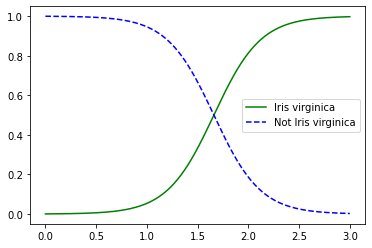

In [5]:
X_new = np.linspace(0, 3, 1000).reshape((-1, 1))
y_proba = log_reg.predict_proba(X_new)

plt.plot(X_new, y_proba[:, 1], "g-", label="Iris virginica")
plt.plot(X_new, y_proba[:, 0], "b--", label="Not Iris virginica")
plt.legend(loc='best')

* log_reg.predict([x]) => returns the class of prediction 
* log_reg.predict_probe([x]) => returns the high probability for particular class

In [6]:
log_reg.predict([[1.83]])

array([1])

In [7]:
# 32% for the 0 class, 67% for the 1 class
log_reg.predict_proba([[1.83]])

array([[0.32413429, 0.67586571]])

## 4. Softmax Regression
* Softmax Function instead of Sigmoid Function
* Multiple Classification task
* 1. Each class has its own dedicated vector of weights => linear regression
* 2. Activation Function = Softmax function (returns the highest estimated probability class)
* 3. Cost Function = Cross Entropy
* 4. Optimization = GD (MSE derivative)

In [8]:
X = iris['data'][:, (2, 3)]
y = iris['target']

In [9]:
# OvA by default
# multiclass='multinomial' => Softmax Regression
# C=10, L2 penalty for regularization
from sklearn.linear_model import LogisticRegression

softmax_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs', C=10)
softmax_reg.fit(X, y)

LogisticRegression(C=10, multi_class='multinomial')

In [10]:
softmax_reg.predict([[5, 2]])

array([2])

In [11]:
softmax_reg.predict_proba([[5, 2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])

In [12]:
iris['target_names'][softmax_reg.predict([[5, 2]])]

array(['virginica'], dtype='<U10')

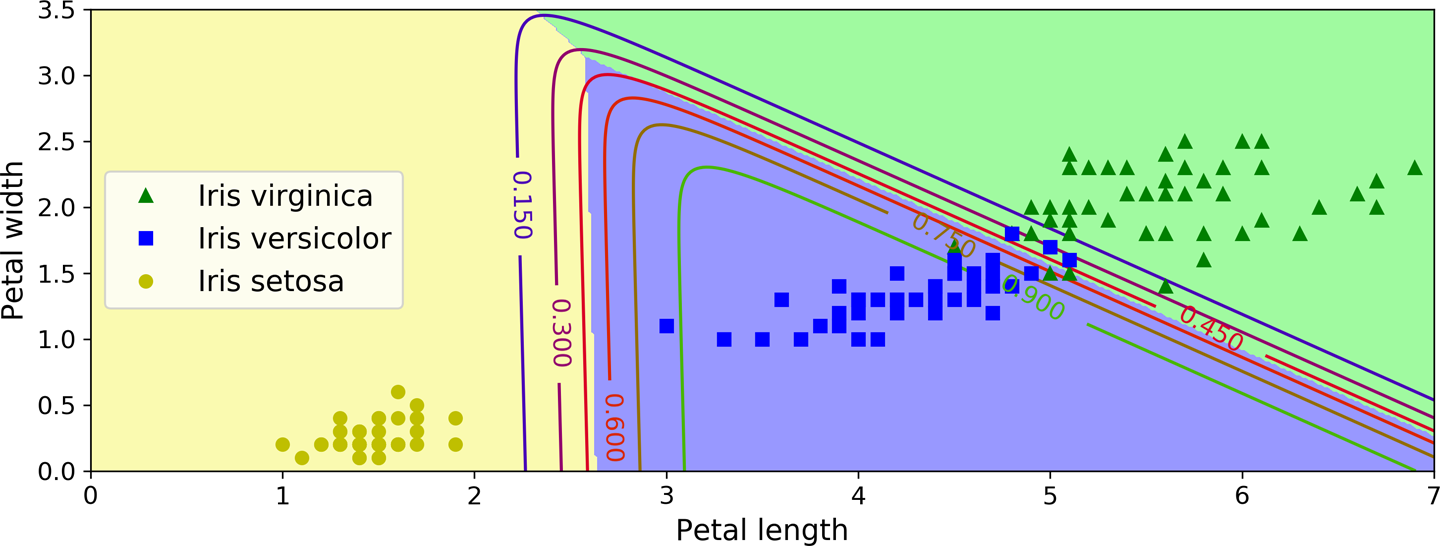